# MTurk Similarity Comparison User Study 1 & 2: Combined Results

In [27]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import h5py
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.stats.multitest import multipletests

df_1 = pd.read_csv('~/Downloads/Batch_3580708_batch_results.csv')
df_2 = pd.read_csv('~/Downloads/Batch_3582472_batch_results.csv')

pattern_sizes = 3
pattern_sizes_names = ['3 kb', '12 kb', '120 kb']
pattern_sizes_shortnames = ['3kb', '12kb', '120kb']
comparisons = 9
technique_options = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
technique_names = ['CAE*', 'ED', 'SAX', 'DTW', 'UMAP', 'TSF', 'XCORR']
options = 2
option_names = ['most', 'second most']
knn = 5

techniques_1 = 7
techniques_2 = 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Aggregate user study 1 results

In [9]:
results_3kb = []
results_12kb = []
results_120kb = []

results_1 = [results_3kb, results_12kb, results_120kb]

rows_3kb = np.where(df_1['Input.T0A'].str.contains('3KB', regex=False).values)[0]
rows_12kb = np.where(df_1['Input.T0A'].str.contains('12KB', regex=False).values)[0]
rows_120kb = np.where(df_1['Input.T0A'].str.contains('120KB', regex=False).values)[0]

for c in np.arange(comparisons):
    c_res_3kb = []
    c_res_12kb = []
    c_res_120kb = []
    for o in np.arange(options):
        o_res_3kb = []
        o_res_12kb = []
        o_res_120kb = []
        for t in technique_options:
            counts = df_1['Answer.T{}{}{}.{}'.format(str(c), str(o + 1), t, t)].value_counts()
            try:
                o_res_3kb.append(df_1['Answer.T{}{}{}.{}'.format(str(c), str(o + 1), t, t)][rows_3kb].value_counts().loc[True])
            except KeyError:
                o_res_3kb.append(0)
            try:
                o_res_12kb.append(df_1['Answer.T{}{}{}.{}'.format(str(c), str(o + 1), t, t)][rows_12kb].value_counts().loc[True])
            except KeyError:
                o_res_12kb.append(0)
            try:
                o_res_120kb.append(df_1['Answer.T{}{}{}.{}'.format(str(c), str(o + 1), t, t)][rows_120kb].value_counts().loc[True])
            except KeyError:
                o_res_120kb.append(0)
        c_res_3kb.append(o_res_3kb)
        c_res_12kb.append(o_res_12kb)
        c_res_120kb.append(o_res_120kb)
    results_3kb.append(c_res_3kb)
    results_12kb.append(c_res_12kb)
    results_120kb.append(c_res_120kb)
    
results_1 = np.array(results_1)

## Aggregate user study 2 results

In [10]:
results_3kb = []
results_12kb = []
results_120kb = []

results_2 = [results_3kb, results_12kb, results_120kb]

rows_3kb = np.where(df_2['Input.T00A'].str.contains('3KB', regex=False).values)[0]
rows_12kb = np.where(df_2['Input.T00A'].str.contains('12KB', regex=False).values)[0]
rows_120kb = np.where(df_2['Input.T00A'].str.contains('120KB', regex=False).values)[0]

for c in np.arange(comparisons):
    c_res_3kb = []
    c_res_12kb = []
    c_res_120kb = []
    for t in technique_options[:techniques_2]:
        t_res_3kb = []
        t_res_12kb = []
        t_res_120kb = []
        for k in np.arange(knn):
            try:
                t_res_3kb.append(df_2['Answer.T{}{}{}.{}'.format(c, k, t, t)][rows_3kb].value_counts().loc[True])
            except KeyError:
                t_res_3kb.append(0)
            try:
                t_res_12kb.append(df_2['Answer.T{}{}{}.{}'.format(c, k, t, t)][rows_12kb].value_counts().loc[True])
            except KeyError:
                t_res_12kb.append(0)
            try:
                t_res_120kb.append(df_2['Answer.T{}{}{}.{}'.format(c, k, t, t)][rows_120kb].value_counts().loc[True])
            except KeyError:
                t_res_120kb.append(0)
        c_res_3kb.append(t_res_3kb)
        c_res_12kb.append(t_res_12kb)
        c_res_120kb.append(t_res_120kb)
    results_3kb.append(c_res_3kb)
    results_12kb.append(c_res_12kb)
    results_120kb.append(c_res_120kb)
    
results_2 = np.array(results_2)

## Plot Combined Results

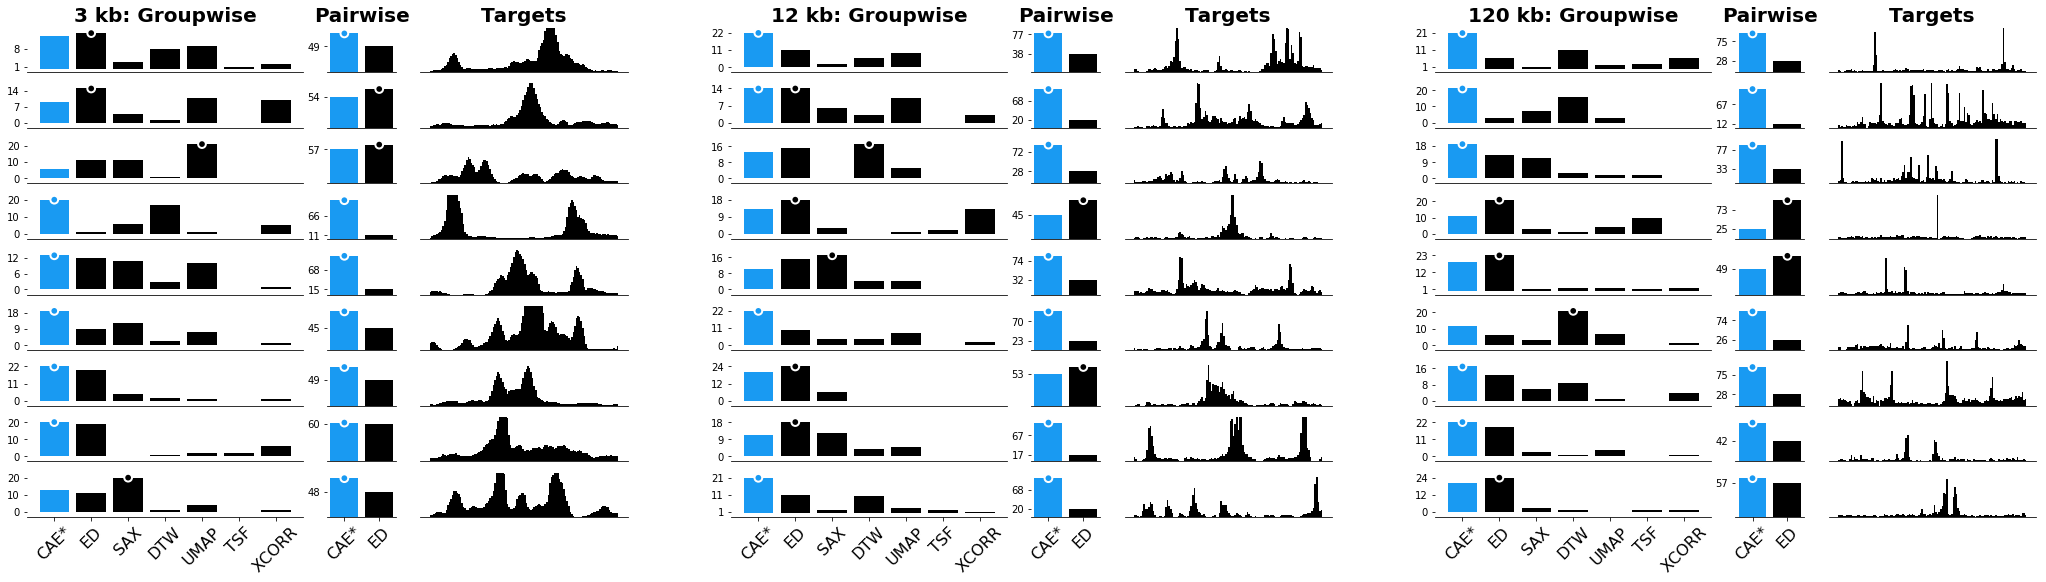

In [28]:
import h5py
import math

fig, ax = plt.subplots(
    nrows=comparisons,
    ncols=pattern_sizes * 4 - 1,
    figsize=(9 * (pattern_sizes + 1), comparisons),
    gridspec_kw=dict(width_ratios=([1,0.25,0.75,0.2] * (pattern_sizes - 1) + [1,0.25,0.75]), wspace=0.15, hspace=0.25)
)

with h5py.File('search-targets.h5', 'r') as f:
    for c in range(comparisons):
        for s in range(pattern_sizes):
            res = np.array([x + results_1[s][c][1][i] for i, x in enumerate(results_1[s][c][0])])

            colors = np.zeros((7, 4)).astype(np.float)
            colors[0,:] = np.array([25.0, 154.0, 242.0, 0.0]) / 255.0
            colors[np.where(res == np.max(res))[0],3] = 1.0
            edgecolors = np.ones((7, 4))
            edgecolors[:,3] = 0
            edgecolors[np.where(res == np.max(res))[0],3] = 1.0
            
            ax[c, s * 4].bar(technique_names, res, color=['#199AF2', '#000000', '#000000', '#000000', '#000000', '#000000', '#000000'], zorder=1)
            ax[c, s * 4].scatter(technique_names, res, color=colors, edgecolors=edgecolors, linewidths=2, s=60, zorder=2)
            ax[c, s * 4].set_yticks(range(min(res), max(res) + 1, max(1, math.floor(max(res) / 2))))
            
            if c == 0:
                ax[c, s * 4].set_title('{}: Groupwise'.format(pattern_sizes_names[s]), fontsize=20, fontweight='bold')
            if c < (comparisons - 1):
                ax[c, s * 4].tick_params(axis='x', length=0)
                ax[c, s * 4].set_xticks([], [])
            else:
                ax[c, s * 4].set_xticklabels(technique_names, fontsize=16, rotation=45)
                
            ax[c, s * 4].spines['top'].set_visible(False)
            ax[c, s * 4].spines['left'].set_visible(False)
            ax[c, s * 4].spines['right'].set_visible(False)
            
            
            res = np.sum(results_2[s][c], axis=1)

            colors = np.zeros((2, 4)).astype(np.float)
            colors[0,:] = np.array([25.0, 154.0, 242.0, 0.0]) / 255.0
            colors[np.where(res == np.max(res))[0],3] = 1.0
            edgecolors = np.ones((2, 4))
            edgecolors[:,3] = 0
            edgecolors[np.where(res == np.max(res))[0],3] = 1.0
            

            ax[c, s * 4 + 1].bar(technique_names[:techniques_2], res, width=0.8, color=['#199AF2', '#000000'], zorder=1)
            ax[c, s * 4 + 1].scatter(technique_names[:techniques_2], res, color=colors, edgecolors=edgecolors, linewidths=2, s=60, zorder=2)
            ax[c, s * 4 + 1].set_yticks(range(min(res), max(res) + 1, max(1, math.floor(max(res) / 2))))
            
            if c == 0:
                ax[c, s * 4 + 1].set_title('Pairwise', fontsize=20, fontweight='bold')
            if c < (comparisons - 1):
                ax[c, s * 4 + 1].tick_params(axis='x', length=0)
                ax[c, s * 4 + 1].set_xticks([], [])
            else:
                ax[c, s * 4 + 1].set_xticklabels(technique_names, fontsize=16, rotation=45)
            ax[c, s * 4 + 1].spines['top'].set_visible(False)
            ax[c, s * 4 + 1].spines['left'].set_visible(False)
            ax[c, s * 4 + 1].spines['right'].set_visible(False)

            target_pattern = f['targets_{}'.format(pattern_sizes_shortnames[s])][c]
            ax[c, s * 4 + 2].bar(np.arange(target_pattern.size), target_pattern, width=1.0, color='k')
            ax[c, s * 4 + 2].set_ylim(0, 1)
            ax[c, s * 4 + 2].set_xticks([], [])
            ax[c, s * 4 + 2].set_yticks([], [])
            ax[c, s * 4 + 2].spines['top'].set_visible(False)
            ax[c, s * 4 + 2].spines['left'].set_visible(False)
            ax[c, s * 4 + 2].spines['right'].set_visible(False)
            
            if c == 0:
                ax[c, s * 4 + 2].set_title('Targets', fontsize=20, fontweight='bold')
            
            if s < pattern_sizes - 1:
                ax[c, s * 4 + 3].set_xticks([], [])
                ax[c, s * 4 + 3].set_yticks([], [])
                ax[c, s * 4 + 3].spines['top'].set_visible(False)
                ax[c, s * 4 + 3].spines['right'].set_visible(False)
                ax[c, s * 4 + 3].spines['bottom'].set_visible(False)
                ax[c, s * 4 + 3].spines['left'].set_visible(False)
fig.savefig(
    'user-study-1-2-results.png',
    bbox_inches="tight",
    pad_inches=0
)